In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

product_data = pd.read_csv("./dataset/product_data.csv")
freezer_data = pd.read_csv("./dataset/freezer_data.csv")
outlets_data = pd.read_csv("./dataset/outlets_data.csv")
sales_data = pd.read_csv("./dataset/sales_data.csv")
week_data = pd.read_csv("./dataset/week_data.csv")

In [80]:
# drop area
outlets_data = outlets_data.drop(['area(sqft)'], axis=1)
outlets_data.drop_duplicates(inplace=True)

In [117]:
sales_data

,Outlet_ID,week,pid,product_name_x,no_units,volume,product_name_y,price,total_vol,total_price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,Vanilla Mini Cone,100,174.8,87400.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,Chocolate Petite Bar,90,21.0,9450.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,Strawberry Tiny Cup,110,239.6,131780.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,Mint Bite-size Pop,100,100.4,50200.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,Butter Pecan Small Stick,100,142.0,71000.0
...,...,...,...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1.0,Chocolate Fudge Big Scoop,1200,56.0,67200.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1.0,Moose Tracks Jumbo Cup,1100,60.0,66000.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1.0,Mint Chocolate Chip Family Pack,1150,51.0,58650.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1.0,Rocky Road Mega Tub,1000,78.0,78000.0


In [84]:
product_data.head()

,pid,volume,product_name,price
0,IP1,0.2,Vanilla Mini Cone,100
1,IP2,0.2,Chocolate Petite Bar,90
2,IP3,0.2,Strawberry Tiny Cup,110
3,IP4,0.2,Mint Bite-size Pop,100
4,IP5,0.2,Butter Pecan Small Stick,100


In [85]:
sales_data =  sales_data.merge(product_data, on='pid', how='left')

In [86]:
sales_data["total_vol"] = sales_data["no_units"] * sales_data["volume"]
sales_data["total_price"] = sales_data["no_units"] * sales_data["price"]

In [87]:
sales_data

,Outlet_ID,week,pid,product_name_x,no_units,volume,product_name_y,price,total_vol,total_price
0,ID7203,1,IP1,Vanilla Mini Cone,874.0,0.2,Vanilla Mini Cone,100,174.8,87400.0
1,ID7203,1,IP2,Chocolate Petite Bar,105.0,0.2,Chocolate Petite Bar,90,21.0,9450.0
2,ID7203,1,IP3,Strawberry Tiny Cup,1198.0,0.2,Strawberry Tiny Cup,110,239.6,131780.0
3,ID7203,1,IP4,Mint Bite-size Pop,502.0,0.2,Mint Bite-size Pop,100,100.4,50200.0
4,ID7203,1,IP5,Butter Pecan Small Stick,710.0,0.2,Butter Pecan Small Stick,100,142.0,71000.0
...,...,...,...,...,...,...,...,...,...,...
80995,ID8207,12,BP1,Chocolate Fudge Big Scoop,56.0,1.0,Chocolate Fudge Big Scoop,1200,56.0,67200.0
80996,ID8207,12,BP2,Moose Tracks Jumbo Cup,60.0,1.0,Moose Tracks Jumbo Cup,1100,60.0,66000.0
80997,ID8207,12,BP3,Mint Chocolate Chip Family Pack,51.0,1.0,Mint Chocolate Chip Family Pack,1150,51.0,58650.0
80998,ID8207,12,BP4,Rocky Road Mega Tub,78.0,1.0,Rocky Road Mega Tub,1000,78.0,78000.0


In [88]:
sales_data_ = sales_data.groupby(["Outlet_ID", "week"])[["total_price", "total_vol"]].sum().reset_index()
sales_data__ = sales_data_.groupby(["Outlet_ID"])[["total_price", "total_vol"]].mean().reset_index()

# rename columns
sales_data__.columns = ["Outlet_ID", "avg_price_per_week", "avg_vol_per_week"]


In [89]:
sales_data__
outlets_data = outlets_data.merge(sales_data__, on='Outlet_ID', how='left')

In [114]:
outlets_data

,Outlet_ID,avg_price_per_week,avg_vol_per_week
0,ID7203,291076.666667,579.100000
1,ID1878,300528.333333,600.666667
2,ID1740,312992.500000,626.450000
3,ID4366,338344.166667,671.733333
4,ID8358,326558.333333,656.300000
...,...,...,...
946,ID4119,469293.333333,641.083333
947,ID2978,495224.166667,671.783333
948,ID6549,534135.833333,735.500000
949,ID1210,506050.000000,710.566667


In [91]:
freezer_data

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


In [92]:
def ceildiv(a, b):
    return -(-a // b)

In [155]:
outlets_data_ = outlets_data.copy()

In [156]:
freezer_volume_dict = dict(zip(freezer_data['Model Number'], freezer_data['Volume Capacity (Liters)']))
freezer_cost_dict = dict(zip(freezer_data['Model Number'], freezer_data['Power and maitainance Cost (LKR) per 100 hours']))

for f_id, f_cap in freezer_volume_dict.items():
    outlets_data_[f"{f_id}s_needed"] = ceildiv(outlets_data_["avg_vol_per_week"], f_cap)
    outlets_data_[f"{f_id}s_cost"] = outlets_data_[f"{f_id}s_needed"] * freezer_cost_dict[f_id]
    

In [157]:
outlets_data_[["M001s_cost", "M002s_cost"]]

,M001s_cost,M002s_cost
0,27500.0,22400.0
1,27500.0,25200.0
2,30000.0,25200.0
3,32500.0,25200.0
4,30000.0,25200.0
...,...,...
946,30000.0,25200.0
947,32500.0,25200.0
948,35000.0,28000.0
949,32500.0,28000.0


In [158]:
def get_min_cost(row):
    freezer_ids = list(freezer_volume_dict.keys())
    freezer_ids.sort()
    min = np.inf
    for f_id in freezer_ids:
        if row[f"{f_id}s_cost"] < min:
            min = row[f"{f_id}s_cost"]
    
    return min

In [159]:
# get minimum M00*s_cost for each outlet
outlets_data_.apply(get_min_cost, axis=1)

0      13500.0
1      17500.0
2      17500.0
3      17500.0
4      17500.0
        ...   
946    17500.0
947    17500.0
948    17500.0
949    17500.0
950    17500.0
Length: 951, dtype: float64

In [160]:
joel_outlets_df = pd.read_csv("./outlet_info_df_with_labels_6.csv")

In [161]:
# joel_outlets_df.fillna(0, inplace=True)

In [162]:
joel_outlets_df

,Outlet_ID,weekly_sale_for_1,weekly_sale_for_2,weekly_sale_for_3,weekly_sale_for_4,weekly_sale_for_5,weekly_sale_for_6,weekly_sale_for_7,weekly_sale_for_8,weekly_sale_for_9,...,Chocolate Petite Bar_earning,Mint Bite-size Pop_earning,Strawberry Tiny Cup_earning,Vanilla Mini Cone_earning,Chocolate Fudge Big Scoop_earning,Cookies and Cream Mega Tub_earning,Mint Chocolate Chip Family Pack_earning,Moose Tracks Jumbo Cup_earning,Rocky Road Mega Tub_earning,labels
0,ID7203,3389.0,2402.0,2805.0,2583.0,2802.0,3227.0,2992.0,3138.0,2309.0,...,656550.0,552000.0,1003970.0,636100.0,0.0,0.0,0.0,0.0,0.0,2
1,ID1878,2597.0,2048.0,2809.0,3724.0,3213.0,3313.0,2883.0,3501.0,3312.0,...,595980.0,795400.0,754160.0,786000.0,0.0,0.0,0.0,0.0,0.0,2
2,ID1740,3742.0,3208.0,3702.0,3060.0,3822.0,3190.0,2138.0,2812.0,2072.0,...,730440.0,719200.0,862070.0,762500.0,0.0,0.0,0.0,0.0,0.0,2
3,ID4366,3410.0,3072.0,3843.0,4036.0,2328.0,2454.0,3181.0,3025.0,3975.0,...,563310.0,875900.0,1015520.0,653000.0,0.0,0.0,0.0,0.0,0.0,2
4,ID8358,2891.0,4185.0,3433.0,4552.0,1080.0,3598.0,3164.0,3497.0,3738.0,...,860580.0,624100.0,841720.0,705700.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,2436.0,2616.0,1920.0,2025.0,3133.0,2046.0,1998.0,1909.0,2352.0,...,459360.0,450300.0,434610.0,417900.0,748800.0,630300.0,725650.0,558800.0,602000.0,4
947,ID2978,2969.0,2079.0,1688.0,2879.0,996.0,3063.0,2525.0,2007.0,1786.0,...,513900.0,500600.0,542740.0,409200.0,760800.0,746900.0,753250.0,553300.0,682000.0,4
948,ID6549,2441.0,2798.0,2446.0,2988.0,3001.0,2743.0,2085.0,2838.0,1903.0,...,553320.0,584400.0,530860.0,493200.0,890400.0,597300.0,778550.0,672100.0,716000.0,4
949,ID1210,2725.0,3084.0,2402.0,3856.0,1667.0,1378.0,2873.0,1994.0,3625.0,...,631800.0,524600.0,606100.0,474500.0,622800.0,744700.0,763600.0,585200.0,608000.0,4


In [163]:
outlets_data__ = outlets_data_.merge(
    joel_outlets_df[["Outlet_ID", "labels"]],
    on="Outlet_ID",
    how="left",
)

In [164]:
outlets_data__

,Outlet_ID,avg_price_per_week,avg_vol_per_week,M001s_needed,M001s_cost,M002s_needed,M002s_cost,M003s_needed,M003s_cost,M004s_needed,...,M006s_cost,M007s_needed,M007s_cost,M008s_needed,M008s_cost,M009s_needed,M009s_cost,M010s_needed,M010s_cost,labels
0,ID7203,291076.666667,579.100000,11.0,27500.0,8.0,22400.0,5.0,16000.0,20.0,...,24300.0,6.0,18000.0,24.0,38400.0,8.0,22400.0,3.0,13500.0,2
1,ID1878,300528.333333,600.666667,11.0,27500.0,9.0,25200.0,6.0,19200.0,21.0,...,27000.0,7.0,21000.0,25.0,40000.0,8.0,22400.0,4.0,18000.0,2
2,ID1740,312992.500000,626.450000,12.0,30000.0,9.0,25200.0,6.0,19200.0,21.0,...,27000.0,7.0,21000.0,26.0,41600.0,8.0,22400.0,4.0,18000.0,2
3,ID4366,338344.166667,671.733333,13.0,32500.0,9.0,25200.0,6.0,19200.0,23.0,...,29700.0,7.0,21000.0,27.0,43200.0,9.0,25200.0,4.0,18000.0,2
4,ID8358,326558.333333,656.300000,12.0,30000.0,9.0,25200.0,6.0,19200.0,22.0,...,29700.0,7.0,21000.0,27.0,43200.0,9.0,25200.0,4.0,18000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,469293.333333,641.083333,12.0,30000.0,9.0,25200.0,6.0,19200.0,22.0,...,27000.0,7.0,21000.0,26.0,41600.0,9.0,25200.0,4.0,18000.0,4
947,ID2978,495224.166667,671.783333,13.0,32500.0,9.0,25200.0,6.0,19200.0,23.0,...,29700.0,7.0,21000.0,27.0,43200.0,9.0,25200.0,4.0,18000.0,4
948,ID6549,534135.833333,735.500000,14.0,35000.0,10.0,28000.0,7.0,22400.0,25.0,...,32400.0,8.0,24000.0,30.0,48000.0,10.0,28000.0,4.0,18000.0,4
949,ID1210,506050.000000,710.566667,13.0,32500.0,10.0,28000.0,6.0,19200.0,24.0,...,29700.0,8.0,24000.0,29.0,46400.0,9.0,25200.0,4.0,18000.0,4


In [165]:
outlets_data_labeled= outlets_data__.groupby("labels")[["avg_price_per_week", "avg_vol_per_week"]].mean().reset_index()

In [166]:
outlets_data_labeled_ = outlets_data_labeled.copy()
for f_id, f_cap in freezer_volume_dict.items():
    outlets_data_labeled_[f"{f_id}s_needed"] = ceildiv(outlets_data_labeled_["avg_vol_per_week"], f_cap)
    outlets_data_labeled_[f"{f_id}s_cost"] = outlets_data_labeled_[f"{f_id}s_needed"] * freezer_cost_dict[f_id]

outlets_data_labeled_

,labels,avg_price_per_week,avg_vol_per_week,M001s_needed,M001s_cost,M002s_needed,M002s_cost,M003s_needed,M003s_cost,M004s_needed,...,M006s_needed,M006s_cost,M007s_needed,M007s_cost,M008s_needed,M008s_cost,M009s_needed,M009s_cost,M010s_needed,M010s_cost
0,0,1.802186e+06,2189.207143,40.0,100000.0,30.0,84000.0,19.0,60800.0,73.0,...,34.0,91800.0,22.0,66000.0,88.0,140800.0,28.0,78400.0,11.0,49500.0
1,1,1.181754e+06,1459.826526,27.0,67500.0,20.0,56000.0,13.0,41600.0,49.0,...,23.0,62100.0,15.0,45000.0,59.0,94400.0,19.0,53200.0,8.0,36000.0
2,2,2.602468e+05,520.402482,10.0,25000.0,7.0,19600.0,5.0,16000.0,18.0,...,9.0,24300.0,6.0,18000.0,21.0,33600.0,7.0,19600.0,3.0,13500.0
3,3,6.236132e+05,561.673773,11.0,27500.0,8.0,22400.0,5.0,16000.0,19.0,...,9.0,24300.0,6.0,18000.0,23.0,36800.0,8.0,22400.0,3.0,13500.0
4,4,5.034180e+05,691.522769,13.0,32500.0,10.0,28000.0,6.0,19200.0,24.0,...,11.0,29700.0,7.0,21000.0,28.0,44800.0,9.0,25200.0,4.0,18000.0
5,5,2.964476e+05,267.188552,5.0,12500.0,4.0,11200.0,3.0,9600.0,9.0,...,5.0,13500.0,3.0,9000.0,11.0,17600.0,4.0,11200.0,2.0,9000.0


In [167]:
def get_min_cost(row):
    freezer_ids = list(freezer_volume_dict.keys())
    freezer_ids.sort()
    min = np.inf
    for f_id in freezer_ids:
        if row[f"{f_id}s_cost"] < min:
            min = row[f"{f_id}s_cost"]
           
    
    return min

In [168]:
def get_min_fid(row):
    freezer_ids = list(freezer_volume_dict.keys())
    freezer_ids.sort()
    min = np.inf
    min_f_id = ""
    for f_id in freezer_ids:
        if row[f"{f_id}s_cost"] < min:
            min = row[f"{f_id}s_cost"]
            min_f_id = f_id
    
    return min_f_id

,labels,avg_price_per_week,avg_vol_per_week,M001s_needed,M001s_cost,M002s_needed,M002s_cost,M003s_needed,M003s_cost,M004s_needed,...,M007s_needed,M007s_cost,M008s_needed,M008s_cost,M009s_needed,M009s_cost,M010s_needed,M010s_cost,min_fridge_cost,min_fridge_id
0,0,1.802186e+06,2189.207143,40.0,100000.0,30.0,84000.0,19.0,60800.0,73.0,...,22.0,66000.0,88.0,140800.0,28.0,78400.0,11.0,49500.0,49500.0,M010
1,1,1.181754e+06,1459.826526,27.0,67500.0,20.0,56000.0,13.0,41600.0,49.0,...,15.0,45000.0,59.0,94400.0,19.0,53200.0,8.0,36000.0,35000.0,M005
2,2,2.602468e+05,520.402482,10.0,25000.0,7.0,19600.0,5.0,16000.0,18.0,...,6.0,18000.0,21.0,33600.0,7.0,19600.0,3.0,13500.0,13500.0,M010
3,3,6.236132e+05,561.673773,11.0,27500.0,8.0,22400.0,5.0,16000.0,19.0,...,6.0,18000.0,23.0,36800.0,8.0,22400.0,3.0,13500.0,13500.0,M010
4,4,5.034180e+05,691.522769,13.0,32500.0,10.0,28000.0,6.0,19200.0,24.0,...,7.0,21000.0,28.0,44800.0,9.0,25200.0,4.0,18000.0,17500.0,M005
5,5,2.964476e+05,267.188552,5.0,12500.0,4.0,11200.0,3.0,9600.0,9.0,...,3.0,9000.0,11.0,17600.0,4.0,11200.0,2.0,9000.0,7000.0,M005


In [170]:
outlets_data_labeled_["min_fridge_cost"] = outlets_data_labeled_.apply(get_min_cost, axis=1)
outlets_data_labeled_["min_fridge_id"] = outlets_data_labeled_.apply(get_min_fid, axis=1)

outlets_data_labeled_

,labels,avg_price_per_week,avg_vol_per_week,M001s_needed,M001s_cost,M002s_needed,M002s_cost,M003s_needed,M003s_cost,M004s_needed,...,M007s_needed,M007s_cost,M008s_needed,M008s_cost,M009s_needed,M009s_cost,M010s_needed,M010s_cost,min_fridge_cost,min_fridge_id
0,0,1.802186e+06,2189.207143,40.0,100000.0,30.0,84000.0,19.0,60800.0,73.0,...,22.0,66000.0,88.0,140800.0,28.0,78400.0,11.0,49500.0,49500.0,M010
1,1,1.181754e+06,1459.826526,27.0,67500.0,20.0,56000.0,13.0,41600.0,49.0,...,15.0,45000.0,59.0,94400.0,19.0,53200.0,8.0,36000.0,35000.0,M005
2,2,2.602468e+05,520.402482,10.0,25000.0,7.0,19600.0,5.0,16000.0,18.0,...,6.0,18000.0,21.0,33600.0,7.0,19600.0,3.0,13500.0,13500.0,M010
3,3,6.236132e+05,561.673773,11.0,27500.0,8.0,22400.0,5.0,16000.0,19.0,...,6.0,18000.0,23.0,36800.0,8.0,22400.0,3.0,13500.0,13500.0,M010
4,4,5.034180e+05,691.522769,13.0,32500.0,10.0,28000.0,6.0,19200.0,24.0,...,7.0,21000.0,28.0,44800.0,9.0,25200.0,4.0,18000.0,17500.0,M005
5,5,2.964476e+05,267.188552,5.0,12500.0,4.0,11200.0,3.0,9600.0,9.0,...,3.0,9000.0,11.0,17600.0,4.0,11200.0,2.0,9000.0,7000.0,M005


In [172]:
outlets_data_falloc = outlets_data_labeled_[
    [
        "labels",
        "min_fridge_id",
        "min_fridge_cost",
        "avg_vol_per_week",
        "avg_price_per_week",
    ]
].copy()

In [173]:
outlets_data_falloc

,labels,min_fridge_id,min_fridge_cost,avg_vol_per_week,avg_price_per_week
0,0,M010,49500.0,2189.207143,1.802186e+06
1,1,M005,35000.0,1459.826526,1.181754e+06
2,2,M010,13500.0,520.402482,2.602468e+05
3,3,M010,13500.0,561.673773,6.236132e+05
4,4,M005,17500.0,691.522769,5.034180e+05
5,5,M005,7000.0,267.188552,2.964476e+05


In [178]:
outlets_data_falloc["nfridges"] = outlets_data_falloc.apply(lambda row: row["min_fridge_cost"]/freezer_cost_dict[row["min_fridge_id"]], axis=1)
outlets_data_falloc['tot_freezer_capacity'] = outlets_data_falloc.apply(lambda row: row["nfridges"]*freezer_volume_dict[row["min_fridge_id"]], axis=1)

outlets_data_falloc

,labels,min_fridge_id,min_fridge_cost,avg_vol_per_week,avg_price_per_week,nfridges,tot_freezer_capacity
0,0,M010,49500.0,2189.207143,1.802186e+06,11.0,2200.0
1,1,M005,35000.0,1459.826526,1.181754e+06,10.0,1500.0
2,2,M010,13500.0,520.402482,2.602468e+05,3.0,600.0
3,3,M010,13500.0,561.673773,6.236132e+05,3.0,600.0
4,4,M005,17500.0,691.522769,5.034180e+05,5.0,750.0
5,5,M005,7000.0,267.188552,2.964476e+05,2.0,300.0


In [179]:
outlets_data_falloc["ROI"] = outlets_data_falloc["avg_price_per_week"] / outlets_data_falloc["min_fridge_cost"]
outlets_data_falloc["item_sales_ratio"] = outlets_data_falloc["avg_vol_per_week"] / outlets_data_falloc["tot_freezer_capacity"]

In [180]:
outlets_data_falloc

,labels,min_fridge_id,min_fridge_cost,avg_vol_per_week,avg_price_per_week,nfridges,tot_freezer_capacity,ROI,item_sales_ratio
0,0,M010,49500.0,2189.207143,1.802186e+06,11.0,2200.0,36.407799,0.995094
1,1,M005,35000.0,1459.826526,1.181754e+06,10.0,1500.0,33.764410,0.973218
2,2,M010,13500.0,520.402482,2.602468e+05,3.0,600.0,19.277538,0.867337
3,3,M010,13500.0,561.673773,6.236132e+05,3.0,600.0,46.193574,0.936123
4,4,M005,17500.0,691.522769,5.034180e+05,5.0,750.0,28.766742,0.922030
5,5,M005,7000.0,267.188552,2.964476e+05,2.0,300.0,42.349651,0.890629


In [181]:
freezer_data

,Freezer Name,Model Number,Volume Capacity (Liters),Power and maitainance Cost (LKR) per 100 hours
0,ChillMaster,M001,55,2500
1,FreezeZone,M002,75,2800
2,CoolTech,M003,120,3200
3,mini CoolTech,M004,30,1800
4,IceBlast Pro,M005,150,3500
5,IceBlast,M006,65,2700
6,FreezeTech,M007,100,3000
7,FreezeTech 3.0,M008,25,1600
8,ChillTech,M009,80,2800
9,IceTech,M010,200,4500


Text(0, 0.5, 'Power and maitainance Cost (LKR) per 100 hours')

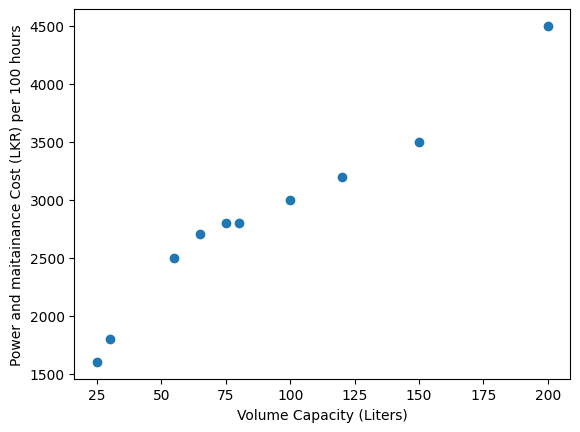

In [184]:
# plot Volume Capacity (Liters) vs Power and maitainance Cost (LKR) per 100 hours
plt.scatter(freezer_data['Volume Capacity (Liters)'], freezer_data['Power and maitainance Cost (LKR) per 100 hours'])
plt.xlabel("Volume Capacity (Liters)")
plt.ylabel("Power and maitainance Cost (LKR) per 100 hours")

In [ ]:
joel_outlets_df

In [185]:
sandil2_df = pd.read_csv("./encoded_outlets.csv")

In [189]:
sandil2_df['cluster'].nunique()

4

In [190]:
sandil2_df.drop_duplicates(subset=['Outlet_ID'], inplace=True)

In [191]:
sandil2_df

,Outlet_ID,0,1,2,cluster
0,ID7203,0.0,0.0,0.836982,2
1,ID1878,0.0,0.0,0.838970,2
2,ID1740,0.0,0.0,0.882608,2
3,ID4366,0.0,0.0,0.960229,2
4,ID8358,0.0,0.0,0.923287,2
...,...,...,...,...,...
983,ID4119,0.0,0.0,0.672923,2
984,ID2978,0.0,0.0,0.685674,2
985,ID6549,0.0,0.0,0.722756,2
986,ID1210,0.0,0.0,0.738447,2


In [192]:
outlets_data_sandil = outlets_data_.merge( sandil2_df[['Outlet_ID', 'cluster']], on='Outlet_ID', how='left')

In [193]:
outlets_data_sandil

,Outlet_ID,avg_price_per_week,avg_vol_per_week,M001s_needed,M001s_cost,M002s_needed,M002s_cost,M003s_needed,M003s_cost,M004s_needed,...,M006s_cost,M007s_needed,M007s_cost,M008s_needed,M008s_cost,M009s_needed,M009s_cost,M010s_needed,M010s_cost,cluster
0,ID7203,291076.666667,579.100000,11.0,27500.0,8.0,22400.0,5.0,16000.0,20.0,...,24300.0,6.0,18000.0,24.0,38400.0,8.0,22400.0,3.0,13500.0,2
1,ID1878,300528.333333,600.666667,11.0,27500.0,9.0,25200.0,6.0,19200.0,21.0,...,27000.0,7.0,21000.0,25.0,40000.0,8.0,22400.0,4.0,18000.0,2
2,ID1740,312992.500000,626.450000,12.0,30000.0,9.0,25200.0,6.0,19200.0,21.0,...,27000.0,7.0,21000.0,26.0,41600.0,8.0,22400.0,4.0,18000.0,2
3,ID4366,338344.166667,671.733333,13.0,32500.0,9.0,25200.0,6.0,19200.0,23.0,...,29700.0,7.0,21000.0,27.0,43200.0,9.0,25200.0,4.0,18000.0,2
4,ID8358,326558.333333,656.300000,12.0,30000.0,9.0,25200.0,6.0,19200.0,22.0,...,29700.0,7.0,21000.0,27.0,43200.0,9.0,25200.0,4.0,18000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
946,ID4119,469293.333333,641.083333,12.0,30000.0,9.0,25200.0,6.0,19200.0,22.0,...,27000.0,7.0,21000.0,26.0,41600.0,9.0,25200.0,4.0,18000.0,2
947,ID2978,495224.166667,671.783333,13.0,32500.0,9.0,25200.0,6.0,19200.0,23.0,...,29700.0,7.0,21000.0,27.0,43200.0,9.0,25200.0,4.0,18000.0,2
948,ID6549,534135.833333,735.500000,14.0,35000.0,10.0,28000.0,7.0,22400.0,25.0,...,32400.0,8.0,24000.0,30.0,48000.0,10.0,28000.0,4.0,18000.0,2
949,ID1210,506050.000000,710.566667,13.0,32500.0,10.0,28000.0,6.0,19200.0,24.0,...,29700.0,8.0,24000.0,29.0,46400.0,9.0,25200.0,4.0,18000.0,2


In [197]:
outlets_data_sandil_labeled= outlets_data_sandil.groupby("cluster")[["avg_price_per_week", "avg_vol_per_week"]].mean().reset_index()

In [198]:
outlets_data_sandil_labeled

,cluster,avg_price_per_week,avg_vol_per_week
0,0,1.181478e+06,1463.351672
1,1,4.832834e+05,435.355531
2,2,3.663203e+05,589.646787
3,3,1.800001e+06,2278.136111


In [199]:
outlets_data_sandil_labeled_ = outlets_data_sandil_labeled.copy()
for f_id, f_cap in freezer_volume_dict.items():
    outlets_data_sandil_labeled_[f"{f_id}s_needed"] = ceildiv(outlets_data_sandil_labeled_["avg_vol_per_week"], f_cap)
    outlets_data_sandil_labeled_[f"{f_id}s_cost"] = outlets_data_sandil_labeled_[f"{f_id}s_needed"] * freezer_cost_dict[f_id]

outlets_data_sandil_labeled_

,cluster,avg_price_per_week,avg_vol_per_week,M001s_needed,M001s_cost,M002s_needed,M002s_cost,M003s_needed,M003s_cost,M004s_needed,...,M006s_needed,M006s_cost,M007s_needed,M007s_cost,M008s_needed,M008s_cost,M009s_needed,M009s_cost,M010s_needed,M010s_cost
0,0,1.181478e+06,1463.351672,27.0,67500.0,20.0,56000.0,13.0,41600.0,49.0,...,23.0,62100.0,15.0,45000.0,59.0,94400.0,19.0,53200.0,8.0,36000.0
1,1,4.832834e+05,435.355531,8.0,20000.0,6.0,16800.0,4.0,12800.0,15.0,...,7.0,18900.0,5.0,15000.0,18.0,28800.0,6.0,16800.0,3.0,13500.0
2,2,3.663203e+05,589.646787,11.0,27500.0,8.0,22400.0,5.0,16000.0,20.0,...,10.0,27000.0,6.0,18000.0,24.0,38400.0,8.0,22400.0,3.0,13500.0
3,3,1.800001e+06,2278.136111,42.0,105000.0,31.0,86800.0,19.0,60800.0,76.0,...,36.0,97200.0,23.0,69000.0,92.0,147200.0,29.0,81200.0,12.0,54000.0


In [200]:
outlets_data_sandil_labeled_["min_fridge_cost"] = outlets_data_sandil_labeled_.apply(get_min_cost, axis=1)
outlets_data_sandil_labeled_["min_fridge_id"] = outlets_data_sandil_labeled_.apply(get_min_fid, axis=1)

outlets_data_sandil_labeled_

,cluster,avg_price_per_week,avg_vol_per_week,M001s_needed,M001s_cost,M002s_needed,M002s_cost,M003s_needed,M003s_cost,M004s_needed,...,M007s_needed,M007s_cost,M008s_needed,M008s_cost,M009s_needed,M009s_cost,M010s_needed,M010s_cost,min_fridge_cost,min_fridge_id
0,0,1.181478e+06,1463.351672,27.0,67500.0,20.0,56000.0,13.0,41600.0,49.0,...,15.0,45000.0,59.0,94400.0,19.0,53200.0,8.0,36000.0,35000.0,M005
1,1,4.832834e+05,435.355531,8.0,20000.0,6.0,16800.0,4.0,12800.0,15.0,...,5.0,15000.0,18.0,28800.0,6.0,16800.0,3.0,13500.0,10500.0,M005
2,2,3.663203e+05,589.646787,11.0,27500.0,8.0,22400.0,5.0,16000.0,20.0,...,6.0,18000.0,24.0,38400.0,8.0,22400.0,3.0,13500.0,13500.0,M010
3,3,1.800001e+06,2278.136111,42.0,105000.0,31.0,86800.0,19.0,60800.0,76.0,...,23.0,69000.0,92.0,147200.0,29.0,81200.0,12.0,54000.0,54000.0,M010


In [203]:
outlets_data_sandil_falloc = outlets_data_sandil_labeled_[
    [
        "cluster",
        "min_fridge_id",
        "min_fridge_cost",
        "avg_vol_per_week",
        "avg_price_per_week",
    ]
].copy()

In [204]:
outlets_data_sandil_falloc

,cluster,min_fridge_id,min_fridge_cost,avg_vol_per_week,avg_price_per_week
0,0,M005,35000.0,1463.351672,1.181478e+06
1,1,M005,10500.0,435.355531,4.832834e+05
2,2,M010,13500.0,589.646787,3.663203e+05
3,3,M010,54000.0,2278.136111,1.800001e+06


In [210]:
outlets_data_sandil_falloc["nfridges"] = outlets_data_sandil_falloc.apply(lambda row: row["min_fridge_cost"]/freezer_cost_dict[row["min_fridge_id"]], axis=1)
outlets_data_sandil_falloc['tot_freezer_capacity'] = outlets_data_sandil_falloc.apply(lambda row: row["nfridges"]*freezer_volume_dict[row["min_fridge_id"]], axis=1)

outlets_data_sandil_falloc.head()

,cluster,min_fridge_id,min_fridge_cost,avg_vol_per_week,avg_price_per_week,nfridges,tot_freezer_capacity,ROI,item_sales_ratio
0,0,M005,35000.0,1463.351672,1.181478e+06,10.0,1500.0,33.756521,0.975568
1,1,M005,10500.0,435.355531,4.832834e+05,3.0,450.0,46.026986,0.967457
2,2,M010,13500.0,589.646787,3.663203e+05,3.0,600.0,27.134836,0.982745
3,3,M010,54000.0,2278.136111,1.800001e+06,12.0,2400.0,33.333359,0.949223


In [206]:
outlets_data_sandil_falloc["ROI"] = outlets_data_sandil_falloc["avg_price_per_week"] / outlets_data_sandil_falloc["min_fridge_cost"]
outlets_data_sandil_falloc["item_sales_ratio"] = outlets_data_sandil_falloc["avg_vol_per_week"] / outlets_data_sandil_falloc["tot_freezer_capacity"]